In [3]:
import pandas as pd

# Membaca file original
df = pd.read_csv('csv/otomatisasi_eval.csv')

# Menghapus duplikat berdasarkan kolom 'iteration' 
# dan mempertahankan baris pertama yang muncul (keep='first')
df_cleaned = df.drop_duplicates(subset=['iteration'], keep='first')

csv_name = 'csv/oto-i10-e15.csv'
# Menyimpan hasil ke file oto1.csv tanpa menyertakan index
df_cleaned.to_csv(csv_name, index=False)

# Menampilkan informasi ringkas
print(f"Jumlah baris awal: {len(df)}")
print(f"Jumlah baris setelah dibersihkan: {len(df_cleaned)}")
print(f"Data berhasil disimpan ke {csv_name}")

Jumlah baris awal: 11
Jumlah baris setelah dibersihkan: 10
Data berhasil disimpan ke csv/oto-i10-e15.csv


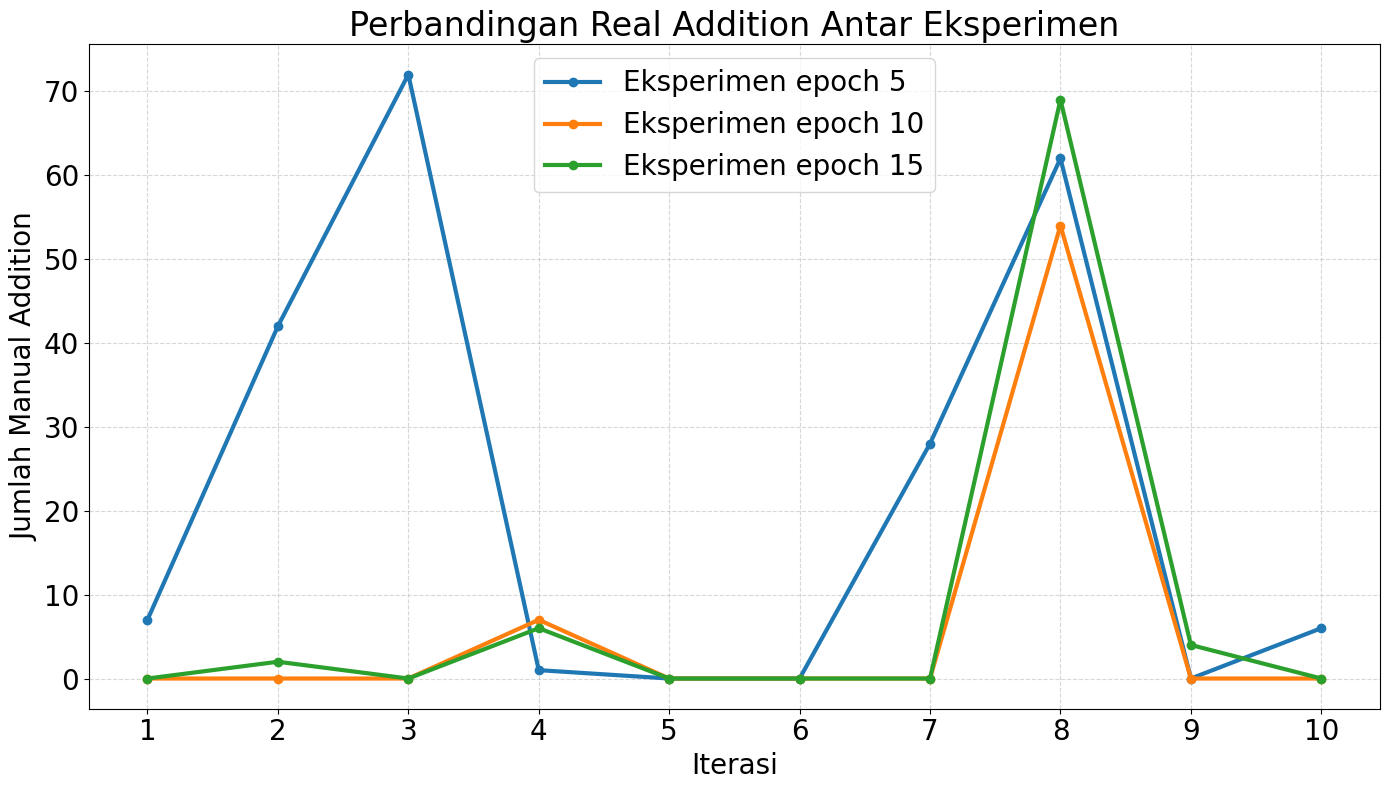

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

FONTSIZE = 20

# 1. Daftar file yang ingin dibandingkan
file_list = ['csv/oto-i10-e5.csv', 'csv/oto-i10-e10.csv', 'csv/oto-i10-e15.csv']
labels = ['Eksperimen epoch 5', 'Eksperimen epoch 10', 'Eksperimen epoch 15']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # Biru, Oranye, Hijau

# Mengatur ukuran figure
plt.figure(figsize=(14, 8))

# 2. Loop melalui setiap file dan tambahkan ke grafik
for i, file_name in enumerate(file_list):
    try:
        # Membaca data
        df = pd.read_csv(file_name)
        df = df.sort_values('iteration')
        
        # Plot garis untuk setiap file
        plt.plot(df['iteration'], df['ril_addition'], 
                 marker='o', linestyle='-', linewidth=3, 
                 label=labels[i], color=colors[i])
            
    except FileNotFoundError:
        print(f"Peringatan: File {file_name} tidak ditemukan.")

# 3. Pengaturan tampilan grafik
plt.title('Perbandingan Real Addition Antar Eksperimen', fontsize=FONTSIZE + 4)
plt.xlabel('Iterasi', fontsize=FONTSIZE)
plt.ylabel('Jumlah Manual Addition', fontsize=FONTSIZE)

# --- PERUBAHAN DISINI: Memperbesar angka pada sumbu X dan Y ---
plt.xticks(range(1, 11), fontsize=FONTSIZE)
plt.yticks(fontsize=FONTSIZE)

plt.grid(True, linestyle='--', alpha=0.5)

# --- PERUBAHAN DISINI: Memperbesar ukuran font Legend ---
plt.legend(fontsize=FONTSIZE)

# 4. Simpan hasil
plt.tight_layout()
plt.savefig('perbandingan_addition_epoch_csv.png')
plt.show()

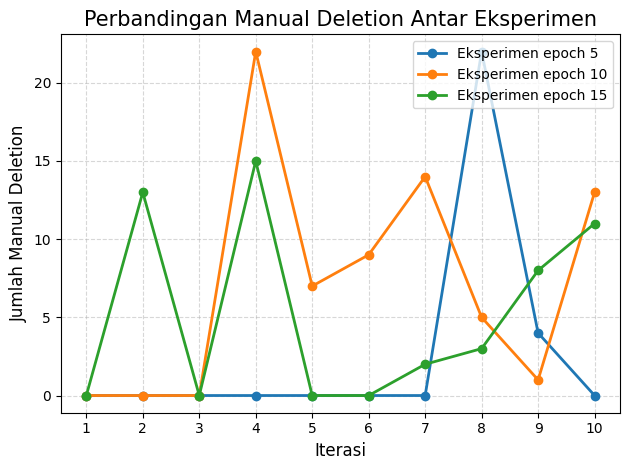

In [11]:
# 2. Loop melalui setiap file dan tambahkan ke grafik
for i, file_name in enumerate(file_list):
    try:
        # Membaca data
        df = pd.read_csv(file_name)
        df = df.sort_values('iteration')
        
        # Plot garis untuk setiap file
        plt.plot(df['iteration'], df['ril_deletion'], 
                 marker='o', linestyle='-', linewidth=2, 
                 label=labels[i], color=colors[i])
        
        # Tambahkan label angka di atas titik (opsional)
        # for x, y in zip(df['iteration'], df['ril_deletion']):
        #     plt.text(x, y + 0.5, str(int(y)), color=colors[i], ha='center', va='bottom', fontsize=9)
            
    except FileNotFoundError:
        print(f"Peringatan: File {file_name} tidak ditemukan. Pastikan file ada di folder yang sama.")

# 3. Pengaturan tampilan grafik
plt.title('Perbandingan Manual Deletion Antar Eksperimen', fontsize=15)
plt.xlabel('Iterasi', fontsize=12)
plt.ylabel('Jumlah Manual Deletion', fontsize=12)
plt.xticks(range(1, 11)) # Menampilkan iterasi 1-10
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend() # Menampilkan keterangan label eksperimen

# 4. Simpan hasil
plt.tight_layout()
plt.savefig('perbandingan_deletion epoch_csv.png')
plt.show()

In [9]:
import pandas as pd
import os

# Daftar file yang akan dihitung
files = ['csv/oto-i10-e5.csv', 'csv/oto-i10-e10.csv', 'csv/oto-i10-e15.csv']
summary_data = []

for file_name in files:
    if os.path.exists(file_name):
        df = pd.read_csv(file_name)
        
        # Menghitung total per file
        total_addition = df['ril_addition'].sum()
        total_deletion = df['ril_deletion'].sum()
        
        summary_data.append({
            'Nama File': file_name,
            'Total Ril Addition': total_addition,
            'Total Ril Deletion': total_deletion
        })
    else:
        print(f"Peringatan: {file_name} tidak ditemukan.")

# Membuat DataFrame ringkasan
if summary_data:
    df_summary = pd.DataFrame(summary_data)
    print("\n--- Ringkasan Total Data ---")
    print(df_summary.to_string(index=False))
    
    # Simpan ringkasan ke CSV
    df_summary.to_csv('csv/summary_totals.csv', index=False)
else:
    print("Tidak ada file yang ditemukan untuk diproses.")


--- Ringkasan Total Data ---
          Nama File  Total Ril Addition  Total Ril Deletion
 csv/oto-i10-e5.csv                 218                  26
csv/oto-i10-e10.csv                  61                  71
csv/oto-i10-e15.csv                  81                  52
